In [12]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
def findClosestCentroids(X,centroids):
    idx=np.zeros(np.shape(X)[0])
    for i,x in enumerate(X):
        dis=np.sum((x-centroids)**2,1)
        idx[i]=np.argmin(dis)
    return(idx)

In [3]:
def computeCentroids(X,idx,K):
    centroids=[np.sum(X[idx==k,:],0)/np.sum((idx==k).astype(int)) for k in range(K)]
    return(centroids)

In [4]:
def kMeansInitCentroids(X,K):
    idx=np.random.choice(X.shape[0],K)
    centroids=[X[k] for k in idx]
    return(centroids)

In [ ]:
def plotData(X,idx,K):
    C=['r','g','b']
    for k in range(K):
        select_index=(idx==k)
        plt.scatter(X[select_index,0],X[select_index,1],c=C[k])

In [56]:
def plotCentroids(Centroids):
    C=['r','g','b']
    for centroids in Centroids:
        for k,centroid in enumerate(centroids):
            plt.scatter(centroid[0],centroid[1],marker='+',c='k',s=100,linewidth=2)

In [72]:
def runKmeans(X,K,N):
    Centroids=[]
    centroids=kMeansInitCentroids(X,K)
    for iter in range(N):
        idx = findClosestCentroids(X,centroids)
        centroids = computeCentroids(X,idx,K)
        Centroids.append(centroids)
    return((idx.astype(int),centroids,Centroids))

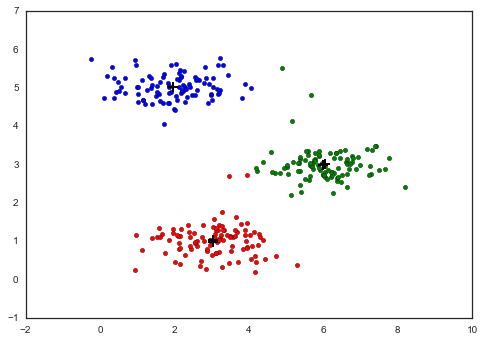

In [61]:
# load data
data = loadmat('data/ex7data2.mat')
X = data['X']
K = 3
N = 10
idx,centroids,Centroids=runKmeans(X,K,N)
plotData(X,idx,K)
plotCentroids(Centroids)

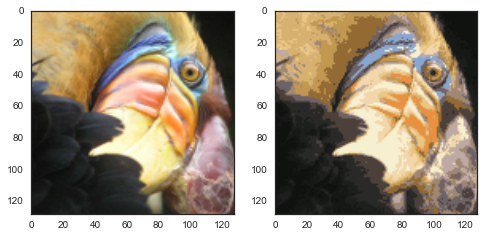

In [111]:
# picture examples
img = plt.imread('data/bird_small.png')
dim = img.shape
img_orig_data=img.reshape(dim[0]*dim[1],3)
K=16
N=5
idx,centroids,Centroids=runKmeans(img_orig_data,K,N)
img_new_data=np.c_[centroids][idx]   # cool! over sampling!!!
img_new=np.c_[img_new_data].reshape(dim[0],dim[1],3)
plt.subplot(1,2,1),plt.imshow(img);
plt.subplot(1,2,2),plt.imshow(img_new);

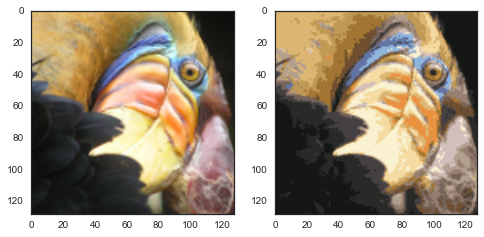

In [110]:
# picture example with Scikit-learn package
from sklearn.cluster import KMeans
K=16
N=5
km=KMeans(K)
km.fit(img_orig_data)
img_new_data = km.cluster_centers_[km.labels_]
img_new=np.c_[img_new_data].reshape(dim[0],dim[1],3)
fig, (ax1, ax2) = plt.subplots(1,2);
ax1.imshow(img);
ax2.imshow(img_new);